In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
method_tags = ['NC', 'DC', 'DC+MRH', 'DCX', 'DCX+MRH']
df = pd.read_csv('out/compare/benchmark/numer_results.csv')
for m in method_tags[1:]:
    df['prc_' + m] = (-df[m]+df['NC'])/(df['NC'])*100
    df['prc_' + m] = df['prc_' + m].round(decimals=2)
df

,parameter,prc_cancel,NC,DC,DC+MRH,DCX,DCX+MRH,prc_DC,prc_DC+MRH,prc_DCX,prc_DCX+MRH
0,cv_h,0,0.545368,0.527897,0.445832,0.521444,0.447554,3.20,18.25,4.39,17.94
1,cv_h,15,0.680652,0.581911,0.534382,0.556803,0.513980,14.51,21.49,18.20,24.49
2,cv_h,30,0.800623,0.633023,0.586515,0.608754,0.575111,20.93,26.74,23.96,28.17
3,wt,0,3.275186,3.276544,3.037267,3.264785,3.043611,-0.04,7.26,0.32,7.07
4,wt,15,4.298889,3.973156,3.653837,3.812294,3.615496,7.58,15.01,11.32,15.90
5,wt,30,6.533454,5.447302,5.221788,5.506570,5.276438,16.62,20.08,15.72,19.24
6,rbt,0,5.754968,5.747398,5.188426,5.722681,5.417677,0.13,9.84,0.56,5.86
7,rbt,15,9.574677,7.230832,6.871371,7.223818,6.564511,24.48,28.23,24.55,31.44
8,rbt,30,15.704333,12.029523,11.990616,12.318930,11.701939,23.40,23.65,21.56,25.49
9,lp,0,49.000000,48.350000,45.000000,48.000000,48.300000,1.33,8.16,2.04,1.43


In [23]:
xp_dist = 8
df = pd.read_pickle('out/EHX_dispatch/0717-093334-trip_record_ob.pkl')
expressed_trips = df[df['expressed']==1]['trip_id'].unique()
tmp_trip = expressed_trips.tolist()[0]
sample_1 = df[(df['trip_id'] == tmp_trip) & (df['expressed'] == 1)].copy()
sample_2 = df[(df['trip_id'] == tmp_trip) & (df['expressed'] == 0)].copy()

In [24]:
sample_1[(sample_1['stop_sequence'] < 9)]

,bus_id,trip_id,stop_id,arr_sec,dep_sec,pax_load,ons,offs,denied,hold_time,skipped,schd_sec,stop_sequence,dist_traveled,expressed,replication
383,898502,911878020,386,24178.073915,24185.573915,3,3,0,0,0,0,24120.0,1,0,1,1
395,898502,911878020,394,24382.373037,24392.316640,4,1,0,0,0,0,24318.0,8,3387,1,1
17796,898502,911878020,386,24120.662190,24120.662190,0,0,0,0,0,0,24120.0,1,0,1,12
17805,898502,911878020,394,24349.892089,24361.405630,2,2,0,0,0,0,24318.0,8,3387,1,12
22658,898502,911878020,386,24240.345279,24248.001925,2,2,0,0,0,0,24120.0,1,0,1,15
22671,898502,911878020,394,24447.005641,24447.005641,2,0,0,0,0,0,24318.0,8,3387,1,15


In [25]:
sample_2[(sample_2['stop_sequence'] == 8) | (sample_2['stop_sequence'] == 1)]

,bus_id,trip_id,stop_id,arr_sec,dep_sec,pax_load,ons,offs,denied,hold_time,skipped,schd_sec,stop_sequence,dist_traveled,expressed,replication
2171,898502,911878020,386,24228.817671,24228.817671,1,1,0,0,0,0,24120.0,1,0,0,2
2201,898502,911878020,394,24514.156636,24514.156636,11,0,0,0,0,0,24318.0,8,3387,0,2
3796,898502,911878020,386,24126.447864,24133.963849,2,2,0,0,0,0,24120.0,1,0,0,3
3830,898502,911878020,394,24389.769453,24389.769453,9,0,0,0,0,0,24318.0,8,3387,0,3
5660,898502,911878020,386,24267.115652,24267.115652,12,12,0,0,0,0,24120.0,1,0,0,4
5679,898502,911878020,394,24590.687188,24590.687188,36,0,0,0,0,0,24318.0,8,3387,0,4
6923,898502,911878020,386,24087.222561,24087.222561,2,2,0,0,0,0,24120.0,1,0,0,5
6948,898502,911878020,394,24303.023667,24303.023667,2,0,0,0,0,0,24318.0,8,3387,0,5
8683,898502,911878020,386,24054.757098,24077.257098,9,9,0,0,0,0,24120.0,1,0,0,6
8712,898502,911878020,394,24362.572723,24371.581731,28,1,0,0,0,0,24318.0,8,3387,0,6


In [59]:
replication_s1 = 15
replication_s2 = 13
df_s1_0 = sample_1[(sample_1['stop_sequence'] == 1) & (sample_1['replication'] == replication_s1)].copy()
df_s1_1 = sample_1[(sample_1['stop_sequence'] == xp_dist) & (sample_1['replication'] == replication_s1)].copy()
t1 = df_s1_1['arr_sec'].iloc[0] - df_s1_0['dep_sec'].iloc[0]
df_s2_0 = sample_2[(sample_2['stop_sequence'] == 1) & (sample_2['replication'] == replication_s2)].copy()
df_s2_1 = sample_2[(sample_2['stop_sequence'] == xp_dist) & (sample_2['replication'] == replication_s2)].copy()
t2 = df_s2_1['arr_sec'].iloc[0] - df_s2_0['dep_sec'].iloc[0]
print(t1, t2)

In [64]:
rep = 4
t0 = 7*60*60 + 20*60
t1 = t0 + 15*60
dist0 = 1.8*3281
dist1 = 6*3281
rep_df = df[df['replication'] == 4].copy()
rep_df = rep_df[(rep_df['arr_sec'] > t0) & (rep_df['arr_sec'] < t1)]
rep_df = rep_df[(rep_df['dist_traveled'] > dist0) & (rep_df['dist_traveled'] < dist1)]
# rep_df[['bus_id', 'stop_sequence', 'schd_sec', 'arr_sec', 'dep_sec', 'ons', 'offs', 'pax_load']]

,bus_id,stop_sequence,schd_sec,arr_sec,dep_sec,ons,offs,pax_load
5809,897602,13,26442.0,26405.690897,26415.690897,2,0,24
5813,897502,20,26610.0,26436.677969,26444.456146,0,1,18
5820,897502,21,26678.0,26507.441027,26514.941027,1,0,19
5825,897502,22,26730.0,26537.723587,26550.223587,0,5,14
5830,897602,14,26520.0,26559.540897,26571.464812,3,3,24
5833,892202,12,26617.0,26584.524275,26593.972459,1,0,7
5835,897502,23,26793.0,26600.244510,26600.244510,0,0,14
5837,897602,15,26571.0,26605.757800,26614.825004,0,1,23
5839,897502,24,26856.0,26638.766583,26656.266583,5,0,19
5840,897602,16,26634.0,26646.876023,26646.876023,0,0,23


In [7]:
import pandas as pd
from Inputs import DATES, STOPS_OUT_FULL_PATT
import numpy as np
import matplotlib.pyplot as plt

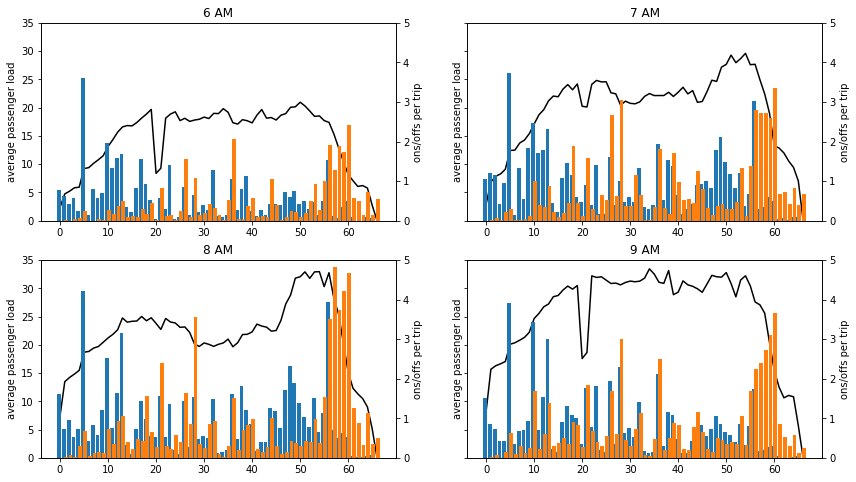

In [10]:
t0 = 6*60*60
t1 = 10*60*60
interv_len = 60*60
df = pd.read_csv('in/raw/rt20_more_apc.csv')
n_intervals = int((t1-t0)/interv_len)
plt.close()
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 8), sharey='all')
stops_x = np.arange(len(STOPS_OUT_FULL_PATT))
w_bar = 0.4
for n in range(n_intervals):
    tmp_t0 = t0 + n*interv_len
    tmp_t1 = t0 + (n+1)*interv_len
    tmp_df = df[(df['avl_sec'] >= tmp_t0) & (df['avl_sec'] < tmp_t1)].copy()
    avg_loads = []
    avg_ons = []
    avg_offs = []
    for s in STOPS_OUT_FULL_PATT:
        stop_df = tmp_df[tmp_df['stop_id'] == int(s)].copy()
        if not stop_df.empty:
            avg_loads.append(stop_df['passenger_load'].mean())
            stop_df['on'] = stop_df['ron'] + stop_df['fon']
            stop_df['off'] = stop_df['roff'] + stop_df['foff']
            avg_ons.append(stop_df['on'].mean())
            avg_offs.append(stop_df['off'].mean())
        else:
            avg_loads.append(np.nan)
            avg_ons.append(np.nan)
            avg_offs.append(np.nan)
    avg_loads[-1] = 0
    avg_ons[-1] = 0
    avg_offs[0] = 0
    axs.flat[n].plot(avg_loads, color='black')
    axs.flat[n].set_ylim(0, 35)
    axs2 = axs.flat[n].twinx()
    axs2.bar(stops_x - w_bar/2, avg_ons)
    axs2.bar(stops_x + w_bar/2, avg_offs)
    axs2.set_ylim(0, 5)
    axs.flat[n].set_title(f'{int(tmp_t0/60/60)} AM')
    axs2.set_ylabel('ons/offs per trip')
    axs.flat[n].set_ylabel('average passenger load')
plt.show()

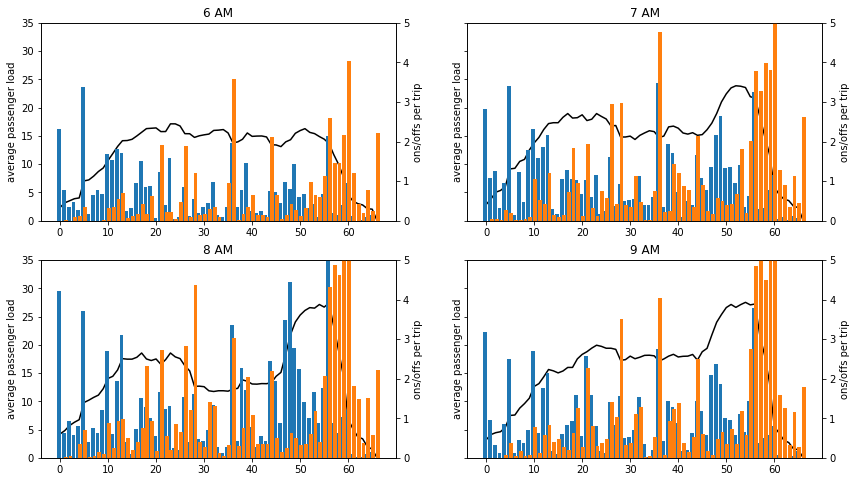

In [11]:
t0 = 6*60*60
t1 = 10*60*60
interv_len = 60*60
df = pd.read_pickle('out/NC/0718-180206-trip_record_ob.pkl')
n_intervals = int((t1-t0)/interv_len)
plt.close()
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 8), sharey='all')
stops_x = np.arange(len(STOPS_OUT_FULL_PATT))
nr_replications = 10
w_bar = 0.4
for n in range(n_intervals):
    tmp_t0 = t0 + n*interv_len
    tmp_t1 = t0 + (n+1)*interv_len
    tmp_df = df[(df['arr_sec'] >= tmp_t0) & (df['arr_sec'] < tmp_t1)].copy()
    avg_loads = []
    avg_ons = []
    avg_offs = []
    for s in STOPS_OUT_FULL_PATT:
        stop_df = tmp_df[tmp_df['stop_id'] == str(s)].copy()
        if not stop_df.empty:
            avg_loads.append(stop_df['pax_load'].mean())
            avg_ons.append(stop_df['ons'].mean())
            avg_offs.append(stop_df['offs'].mean())
        else:
            avg_loads.append(np.nan)
            avg_ons.append(np.nan)
            avg_offs.append(np.nan)
    avg_loads[-1] = 0
    avg_ons[-1] = 0
    avg_offs[0] = 0
    axs.flat[n].plot(avg_loads, color='black')
    axs.flat[n].set_ylim(0, 35)
    axs2 = axs.flat[n].twinx()
    axs2.bar(stops_x - w_bar/2, avg_ons)
    axs2.bar(stops_x + w_bar/2, avg_offs)
    axs2.set_ylim(0, 5)
    axs.flat[n].set_title(f'{int(tmp_t0/60/60)} AM')
    axs2.set_ylabel('ons/offs per trip')
    axs.flat[n].set_ylabel('average passenger load')
plt.show()

In [3]:
df1 = pd.read_pickle('out/DC+MRH/0719-145146-trip_record_ob.pkl')
df2 = pd.read_pickle('out/DCX+MRH/0719-145201-trip_record_ob.pkl')

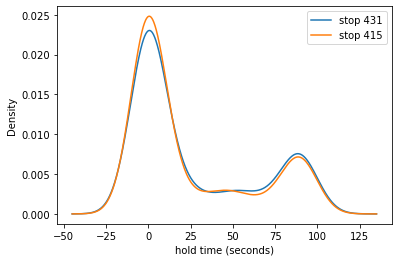

In [13]:
plt.close()
df1[df1['stop_id'] == '431']['hold_time'].plot.kde(label='stop 431')
df1[df1['stop_id'] == '415']['hold_time'].plot.kde(label='stop 415')
plt.xlabel('hold time (seconds)')
plt.legend()
plt.show()

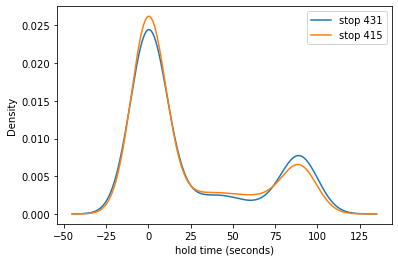

In [12]:
plt.close()
df2[df2['stop_id'] == '431']['hold_time'].plot.kde(label='stop 431')
df2[df2['stop_id'] == '415']['hold_time'].plot.kde(label='stop 415')
plt.xlabel('hold time (seconds)')
plt.legend()
plt.show()

,bus_id,trip_id,stop_id,arr_sec,dep_sec,pax_load,ons,offs,denied,hold_time,skipped,schd_sec,stop_sequence,dist_traveled,expressed,replication
27,898403,911900030,415,19247.971489,19247.971489,8,0,0,0,0.0,0,19346.0,28,17959,0,1
80,897602,911285020,415,20270.680373,20270.680373,13,0,0,0,0.0,0,20366.0,28,17959,0,1
149,899503,911000030,415,21388.752117,21388.752117,14,0,0,0,0.0,0,21266.0,28,17959,0,1
227,907002,911381020,415,22538.147959,22538.147959,15,0,0,0,0.0,0,22646.0,28,17959,0,1
280,897302,911316020,415,23152.115518,23152.115518,13,0,0,0,0.0,0,23246.0,28,17959,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29954,906302,910506020,415,31611.138845,31701.138845,18,0,2,0,90.0,0,31790.0,28,17959,0,15
30044,907402,911267020,415,32223.407034,32223.407034,18,0,0,0,0.0,0,32300.0,28,17959,0,15
30106,898502,911880020,415,32710.560585,32710.560585,15,0,0,0,0.0,0,32866.0,28,17959,0,15
30193,887302,911370020,415,33396.975354,33405.652168,20,1,2,0,0.0,0,33433.0,28,17959,0,15
